# 数字图像处理
图像在计算机里使用矩阵(数组)来表示. 我们可以编程来分析图像的数值特征.

## 读取和显示图像
读取JPG图像, 使用**matplotlib.image**显示图像.

numpy.ndarray

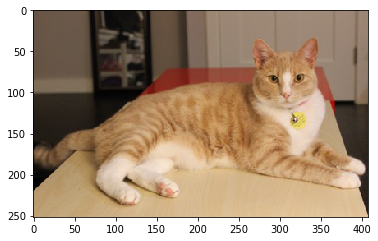

In [44]:
from matplotlib import image as mpimg
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

img1 = mpimg.imread('cat.jpg')
plt.imshow(img1)
type(img1)

In [45]:
!pwd


/Users/yuanyuan/course.txkj/private.git.label.group/Lesson6-Pure-CV


注意 **img1** 对象的类别是多维 numpy array.



In [46]:
img1.shape

(252, 408, 3)

图像由三个*通道*红绿蓝(RGB)像素值组成.每一个通道是由252 x 408像素构成 (图像的高和宽).

我们再试着使用另外一个方法读取图像 - **cv2**.

numpy.ndarray

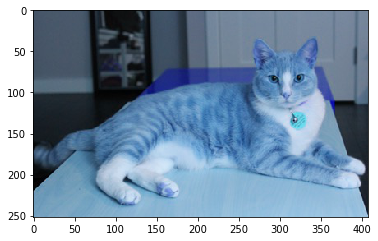

In [47]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

img2 = cv2.imread('cat.jpg')
plt.imshow(img2)
type(img2)

注意图像的色彩由问题.因为cv2加载图像后保存为BGR, 而非RGB的格式. 需要如下方式变换:

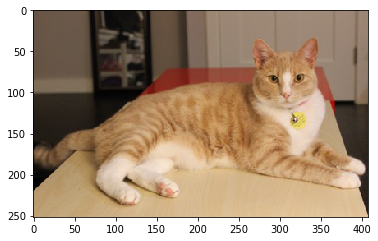

In [48]:
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
plt.imshow(img2)

另一个常用的图像处理库 - **PIL**:

PIL.JpegImagePlugin.JpegImageFile

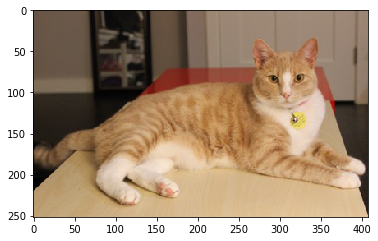

In [49]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img3 = Image.open('cat.jpg')
plt.imshow(img3)
type(img3)

注意此时的图像类型是 JpegImageFile - 而非 numpy array. 这种类型的数据适合PIL库的函数/方法. 可以转换为numpy array:

In [50]:
import numpy as np

img3 = np.array(img3)
img3.shape

(252, 408, 3)

大多数时候我们使用numpy array来表达图像. 可以使用如下方法保存numpy array:

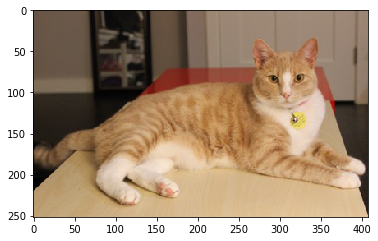

In [51]:
import numpy as np

# Save the image
np.save('cat.npy', img3)

#Load the image
img3 = np.load('cat.npy')

plt.imshow(img3)

## 缩放图像
大多数机器学习模型需要输入图像是某一特定尺寸, 我们需要缩放图像:

Original size: 408 x 252
New size: 200 x 200


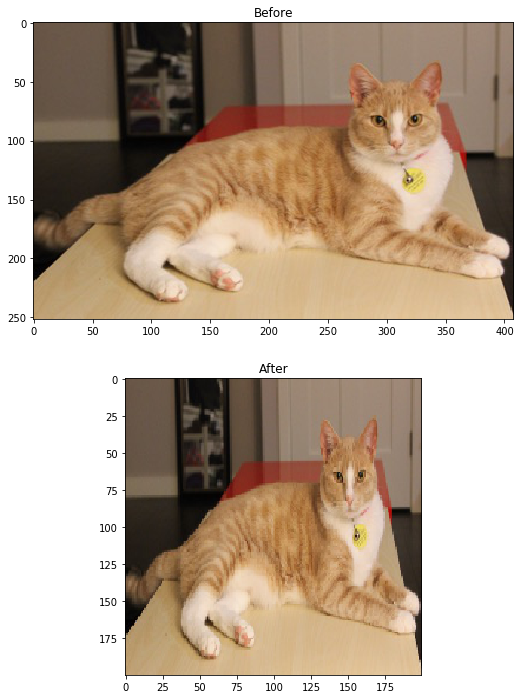

In [52]:
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
%matplotlib inline

# 将numpy数组转换为PIL Image对象
orig_img = Image.fromarray(img3)

# 原来图像尺寸
o_h, o_w = orig_img.size
print('Original size:', o_h, 'x', o_w)

# 缩放为 200 x 200 
target_size = (200,200)
new_img = orig_img.resize(target_size)
n_h, n_w = new_img.size
print('New size:', n_h, 'x', n_w)

# 显示原来的和缩放后的图像
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(2,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Before')

# Subplot for resized image
a=fig.add_subplot(2,1,2)
imgplot = plt.imshow(new_img)
a.set_title('After')

plt.show()


图像缩放造成了图像形变. 我们可以按照原来图像宽高比缩放图像, 避免形变.

Original size: 408 x 252
Scaled size: 200 x 123
New size: 408 x 252


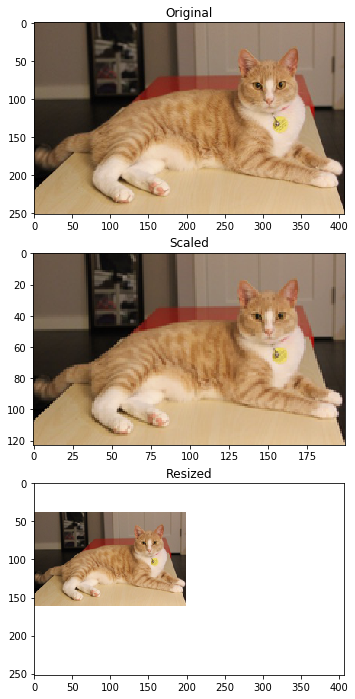

In [53]:
from PIL import Image, ImageOps

orig_img = Image.open('cat.jpg')

# Get the image size
orig_height, orig_width = orig_img.size
print('Original size:', orig_height, 'x', orig_width)

# We'll resize this so it's 200 x 200
target_size = (200,200)

# 使用thumbnail方法缩放图像
scaled_img = orig_img.copy()
scaled_img.thumbnail(target_size, Image.ANTIALIAS)
scaled_height, scaled_width = scaled_img.size
print('Scaled size:', scaled_height, 'x', scaled_width)


# 使用白色背景
new_img = Image.new("RGB", (orig_height, orig_width), (255, 255, 255))

# 将缩放的图像放置在白色背景上
new_img.paste(scaled_img, (int((target_size[0] - scaled_img.size[0]) / 2), int((target_size[1] - scaled_img.size[1]) / 2)))
new_height, new_width = new_img.size
print('New size:', new_height, 'x', new_width)

# 显示原来的和缩放后的图像
# Create a figure
fig = plt.figure(figsize=(12, 12))

# Subplot for original image
a=fig.add_subplot(3,1,1)
imgplot = plt.imshow(orig_img)
a.set_title('Original')

# Subplot for scaled image
a=fig.add_subplot(3,1,2)
imgplot = plt.imshow(scaled_img)
a.set_title('Scaled')

# Subplot for resized image
a=fig.add_subplot(3,1,3)
imgplot = plt.imshow(new_img)
a.set_title('Resized')

plt.show()

## 查看图像的数值特征
图像的类型

In [54]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

img3 = Image.open('cat.darkened.jpeg')
img3 = np.array(img3)
img3.dtype

dtype('uint8')

数组包含8位的整数值. 值的范围0-255. RGB色彩通道每一个像素可能的值.

一个比较自然的图像的值的分布应该是均匀分布的, 可以通过直方图查看.

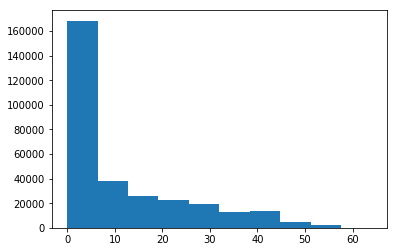

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline

# Plot a histogram - we need to use ravel to "flatten" the 3 dimensions
plt.hist(img3.ravel())
plt.show()

另外一个方法是看累积分布函数 (CDF)图.

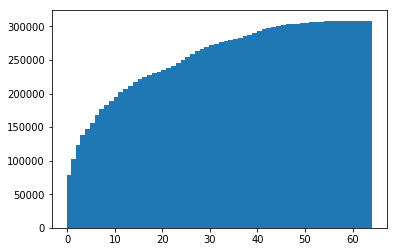

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(img3.ravel(), bins=255, cumulative=True)
plt.show()

直方图和CDF都预示图像的值的分布不均衡.

直方图均衡通过调整图像的像素值使得其值变为均匀分布.

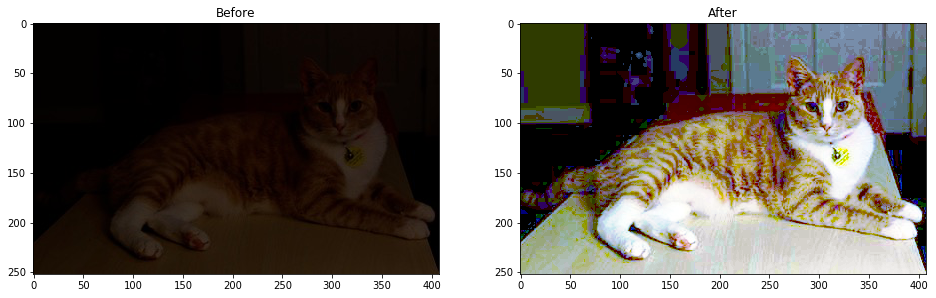

In [57]:
from PIL import Image, ImageOps
%matplotlib inline

# Equalize the image - but we need to convert the numpy array back to the PIL image format
img3PIL_eq = ImageOps.equalize(Image.fromarray(img3))

# Display using matplotlib

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.imshow(img3)
a.set_title('Before')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.imshow(img3PIL_eq)
a.set_title('After')

plt.show()

现在看看直方图均衡后的图像直方图

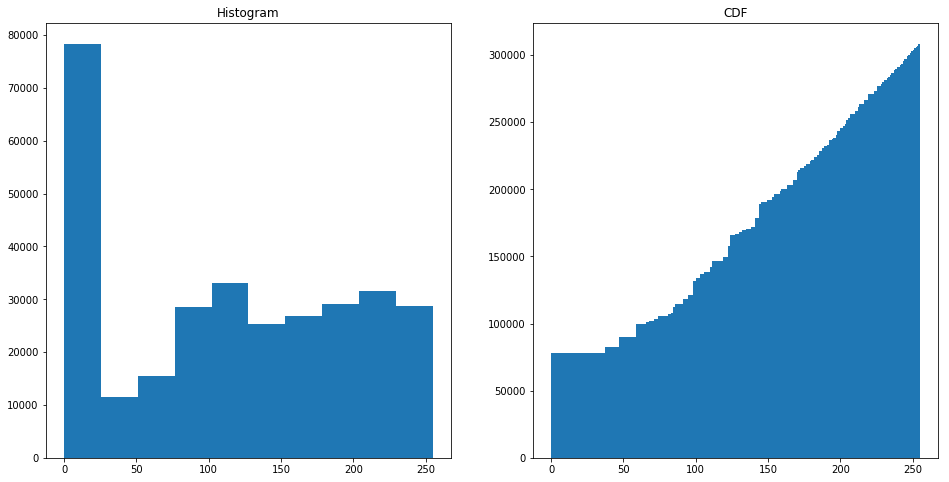

In [58]:
# Display histograms
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
%matplotlib inline

img3_eq = np.array(img3PIL_eq)

# Create a figure
fig = plt.figure(figsize=(16, 8))

# Subplot for original image
a=fig.add_subplot(1,2,1)
imgplot = plt.hist(img3_eq.ravel())
a.set_title('Histogram')

# Subplot for processed image
a=fig.add_subplot(1,2,2)
imgplot = plt.hist(img3_eq.ravel(), bins=255, cumulative=True)
a.set_title('CDF')

plt.show()

与原图相比, 更加均匀分布

## 使用滤波器去噪声

去除 "salt and pepper" 噪声

### 添加随机噪声
模拟低亮度时拍摄的照片, 包括大量随机噪声

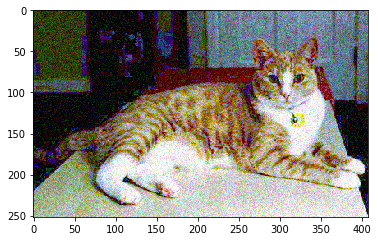

In [59]:
import skimage
%matplotlib inline

img3_n = skimage.util.random_noise(img3_eq)
plt.imshow(img3_n)

### 高斯滤波器
使用一个像素临近区域的像素的加权均值代替原来的值.

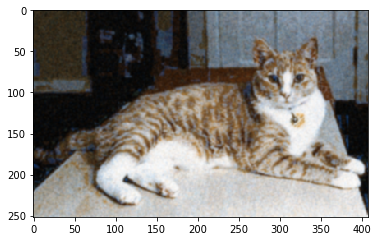

In [60]:
from scipy.ndimage.filters import gaussian_filter as gauss
%matplotlib inline

img3_gauss = gauss(img3_n, sigma=1)   
plt.imshow(img3_gauss)

### 中值滤波
使用一个像素临近区域的像素的中间值代替原来的值.

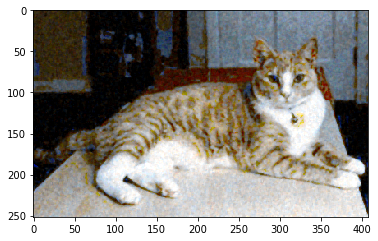

In [61]:
from scipy.ndimage.filters import median_filter as med
%matplotlib inline

img3_med = med(img3_n, size=3)
plt.imshow(img3_med)

### 特征提取

#### Sobel 边缘检测
寻找图像中在纵横方向上面值变化比较大的区域. 

步骤:

1. 将彩色图像转换为灰度图像.
2. 计算横向和纵向的梯度. 
3. 计算梯度的大小.
4. 规范化梯度值. 


Text(0.5,1,'Canny filter')

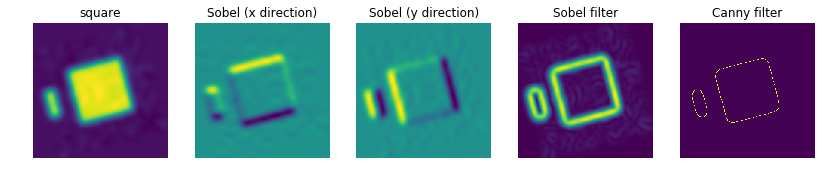

In [62]:
def edge_sobel(image):
    from scipy import ndimage
    import skimage.color as sc
    import numpy as np
    image = sc.rgb2gray(image) # Convert color image to gray scale
    dx = ndimage.sobel(image, 1)  # horizontal derivative
    dy = ndimage.sobel(image, 0)  # vertical derivative
    mag = np.hypot(dx, dy)  # magnitude
    mag *= 255.0 / np.amax(mag)  # normalize (Q&D)
    mag = mag.astype(np.uint8)
    return mag

from PIL import Image, ImageOps
import numpy as np
from PIL import Image
from scipy import ndimage
%matplotlib inline


# first with synthetic data
img = np.zeros((256, 256)) # this function takes a tuple for shape
img[64:-64, 64:-64] = 1 # make a big square
img[96:-96, 0:25] = 1 # make a small rectangle

# add some random noise
noise = np.random.randn(img.shape[0], img.shape[1]) / 2# this function does not
img += noise

img = ndimage.rotate(img, 15, mode='constant')
img = ndimage.gaussian_filter(img, 8)

sx = ndimage.sobel(img, axis=0, mode='constant')
sy = ndimage.sobel(img, axis=1, mode='constant')
sob = np.hypot(sx, sy)

from scipy import ndimage

from skimage.feature import canny
canny_edges = canny(img, sigma=5)

fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(151)  # far left side
ax1.imshow(img)
ax1.set_axis_off()
ax1.set_title("square")

ax2 = fig.add_subplot(152)  # left middle
ax2.imshow(sx)
ax2.set_axis_off()
ax2.set_title("Sobel (x direction)")

ax3 = fig.add_subplot(153)  # right middle
ax3.imshow(sy)
ax3.set_axis_off()
ax3.set_title("Sobel (y direction)")

ax4 = fig.add_subplot(154)  # right middle
ax4.imshow(sob)
ax4.set_axis_off()
ax4.set_title("Sobel filter")

ax5 = fig.add_subplot(155)  # right middle
ax5.imshow(canny_edges)
ax5.set_axis_off()
ax5.set_title("Canny filter")



Text(0.5,1,'Canny filter')

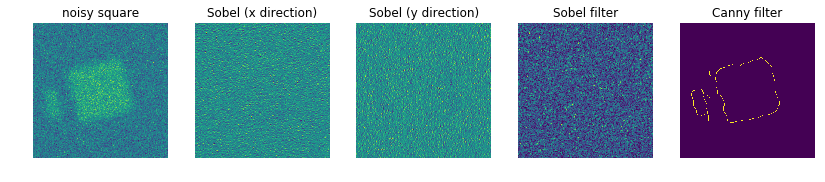

In [63]:
#Turn up the noise!

# Add MORE noise (we don't Gaussian blur it out this time)
noise = np.random.randn(img.shape[0], img.shape[1]) / 2
img += noise

sx = ndimage.sobel(img, axis=0, mode='constant')
sy = ndimage.sobel(img, axis=1, mode='constant')
sob = np.hypot(sx, sy)
canny_edges = canny(img, sigma=5)

fig = plt.figure(figsize=(14,14))

ax1 = fig.add_subplot(151)  # far left side
ax1.imshow(img)
ax1.set_axis_off()
ax1.set_title("noisy square")

ax2 = fig.add_subplot(152)  # left middle
ax2.imshow(sx)
ax2.set_axis_off()
ax2.set_title("Sobel (x direction)")

ax3 = fig.add_subplot(153)  # right middle
ax3.imshow(sy)
ax3.set_axis_off()
ax3.set_title("Sobel (y direction)")

ax4 = fig.add_subplot(154)  # right middle
ax4.imshow(sob)
ax4.set_axis_off()
ax4.set_title("Sobel filter")

ax5 = fig.add_subplot(155)  # right middle
ax5.imshow(canny_edges)
ax5.set_axis_off()
ax5.set_title("Canny filter")



#### Harris Corner Detector 哈里斯边角侦测
检测在所有方向像素值变化都比较大的区域, 这些区域被称为corner, 边角. 

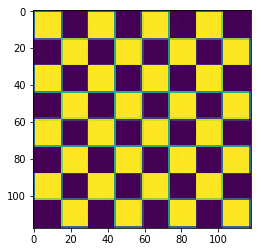

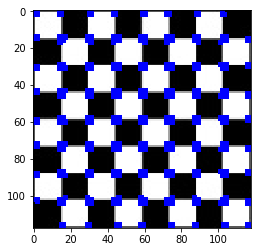

(<matplotlib.image.AxesImage at 0x125b8ab38>, None)

In [64]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

filename = 'chessboard.jpg'
img = cv2.imread(filename)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

gray = np.float32(gray)
plt.imshow(gray),plt.show()
dst = cv2.cornerHarris(gray,2,3,0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.01*dst.max()]=[0,0,255]


plt.imshow(img),plt.show()



### 参考资料


[matplotlib](https://matplotlib.org/)

[Python Imaging Library (PIL)](http://effbot.org/imagingbook/)

[OpenCV (CV2)](https://docs.opencv.org/3.1.0/index.html)